In [1]:
import numpy as np
from matplotlib import pyplot as plt
plt.rcParams['axes.grid'] = True
plt.rcParams['xtick.top'] = True
plt.rcParams['ytick.right'] = True
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
%matplotlib widget

In [2]:
N = 1000
N_ORDER = 3
NOISE_FACTOR = 50

xs = np.sort(5 * (2*np.random.rand(1000) - 1))
coefficients = 10* (2*np.random.random(N_ORDER+1) - 1)
print(f"original coefficients = {coefficients}")
equation_string = "y = "
for power, coefficient in enumerate(coefficients):
       if coefficient >0:
              equation_string+= r'$+$'
       equation_string += fr'{coefficient:.2f}$x^{power}$ '
poly = np.poly1d(coefficients)
ys = poly(xs)
ys_noise = ys + NOISE_FACTOR*np.random.randn(N)
coefficients_fit = np.polyfit(xs, ys_noise, N_ORDER)
print(f"coefficients from fit = {coefficients}")
poly_fit = np.poly1d(coefficients_fit)
ys_fit = poly_fit(xs)

original coefficients = [ 0.33606819 -3.58176192  3.43920049 -7.28510078]
coefficients from fit = [ 0.33606819 -3.58176192  3.43920049 -7.28510078]


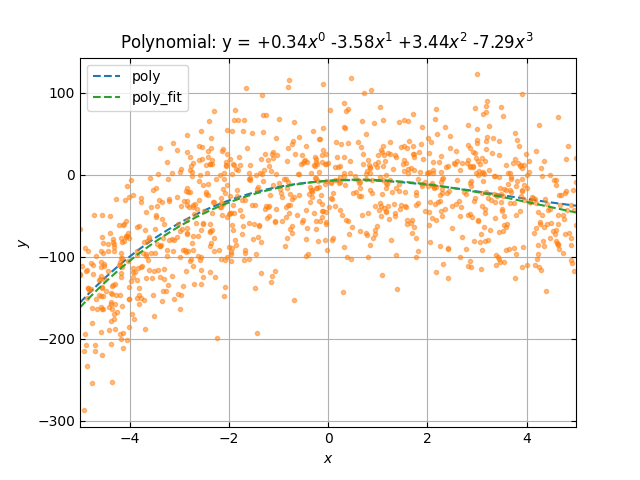

In [3]:
fig, ax = plt.subplots()


ax.plot(xs, ys, '--', label='poly')
ax.plot(xs, ys_noise, '.', alpha=0.5)
ax.plot(xs, ys_fit, '--', label='poly_fit')
ax.legend()
ax.set_xlim(xs[0], xs[-1])
ax.set_xlabel(r'$x$')
ax.set_ylabel(r'$y$')
ax.set_title(f"Polynomial: {equation_string}");
